# Dawai.AI: Streamlining the Pharmacy Experience

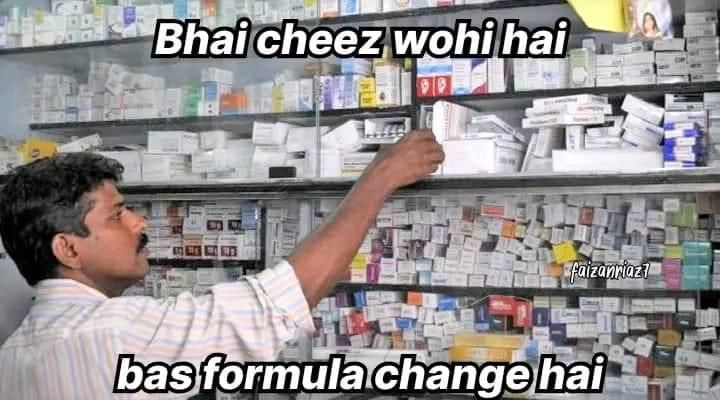

In [1]:
!pip install git+https://github.com/openai/whisper.git -q
!pip install gradio -q
!pip install spacy
!pip install --no-deps https://huggingface.co/kormilitzin/en_core_med7_trf/resolve/main/en_core_med7_trf-any-py3-none-any.whl
!pip install spacy_transformers
!pip install --upgrade pydantic==1.*
!pip install word2number
!pip install gTTS

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
import whisper
import gradio as gr
import time
import spacy
import spacy_transformers
from spacy import displacy
from IPython.display import Audio
from word2number import w2n
import pandas as pd
from gtts import gTTS
import os

In [3]:
model = whisper.load_model("medium")

100%|██████████████████████████████████████| 1.42G/1.42G [00:14<00:00, 104MiB/s]


In [4]:
converted_text = ""

def transcribe_stt(audio):

  global converted_text

  audio = whisper.load_audio(audio)
  audio = whisper.pad_or_trim(audio)

  mel= whisper.log_mel_spectrogram(audio).to(model.device)

  #detect language bring spoken
  _, probs = model.detect_language(mel)
  print(f"Language being spoken: {max(probs,key=probs.get)}")

  # if max(probs,key=probs.get) != "english":
  #   mel = model.translate(mel, "english")

  #decoding the audio to text now
  opt = whisper.DecodingOptions(fp16 = False)
  res = whisper.decode(model,mel,opt)
  converted_text=res.text

  return res.text

In [5]:
gr.Interface(
    title = 'Dawai.AI (speech to text recognition using OpenAI Whisper API)',
    fn= transcribe_stt,
    inputs=[
        gr.Audio(source='microphone', type='filepath')
    ],
    outputs=[
        'textbox'
    ],
    live=True).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:188: UserWarning: Trying to convert audio automatically from int32 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Language being spoken: en
Keyboard interruption in main thread... closing server.


In [11]:
print("Spoken Sentence: ", converted_text)

Spoken Sentence:  two 500mg tablet of Aspirin


In [7]:
inventory = [
    "Acetaminophen",
    "Amoxicillin",
    "Ibuprofen",
    "Aspirin",
    "Metformin",
    "Panadol",
    "Atorvastatin",
    "Simvastatin",
    "Albuterol",
    "Citalopram",
    "Sertraline",
    "Loratadine",
    "Omeprazole",
    "Losartan",
    "Metoprolol",
    "Fluticasone",
    "Escitalopram",
    "Azithromycin",
    "Cetirizine",
    "Trazodone",
]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.0/1.0 GB 22.0 MB/s eta 0:00:01

In [8]:

nlp = spacy.load("en_core_med7_trf")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_med7_trf' (3.4.2.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [9]:
options = options={
    'colors': {'STRENGTH': '#ff3e22', 'DRUG': '#2cf84e', 'DOSAGE': 'aqua', 'FORM': 'yellow'}
}

In [16]:
# hard coded for testing
#converted_text = "Can I get two doses of 500mg panadol please? Thank you"


doc = nlp(converted_text)
displacy.render(doc, style="ent", jupyter=True, options=options)
entities = [(ent.text, ent.label_) for ent in doc.ents]

for entity in entities:
  if entity[1] == "DOSAGE":
    dosage = entity[0]
    print(entity)

for entity in entities:
  if entity[1] == "STRENGTH":
    strength = entity[0]
    print(entity)

for entity in entities:
  if entity[1] == "FORM":
    form = entity[0]
    print(entity)

for entity in entities:
  if entity[1] == "DRUG":
    drug = entity[0]
    print(entity)


dosage = w2n.word_to_num(dosage)
dosage = int(dosage)

('two', 'DOSAGE')
('500mg', 'STRENGTH')
('panadol', 'DRUG')


In [13]:
df = pd.read_csv("MedicineList.csv")

for index, row in df.iterrows():
    if row['Medicine'].lower() == drug.lower():
        if row['Quantity'] >= dosage:
            # Subtract the dosage from the quantity for the matching medicine
            df.at[index, 'Quantity'] -= dosage
            shelf_number = row['shelf']
            aisle_number = row['aisle']
            print(f"Shelf: {shelf_number}, Aisle: {aisle_number}")
            break
else:
    print("Drug not available or insufficient quantity.")

df.to_csv("MedicineList.csv", index=False)

Shelf: 1, Aisle: 1


In [14]:
mytext = drug + "available at shelf " + str(shelf_number) + "aisle number "+ str(aisle_number) + "please take " + str(dosage) + "mg" + form + "only, Thank You UwU"
# mytext = "hello world"
language = 'en'
obj = gTTS(text=mytext, lang=language, slow=False)
obj.save("voice.mp3")
os.system("mpg321 welcome.mp3")

32512

In [15]:
from IPython.display import Audio
Audio("/content/voice.mp3")